In [79]:
import os
import re
import subprocess

import numpy as np
import networkx as nx

import pandas as pd

from qiskit import *
from qiskit.visualization import plot_histogram, plot_state_city


# QAOA In Silq - Max Cut Graph
Author: Ryan Dougherty

UUID: 606085269

First, lets take a look at the 6 node graph I used in the program:

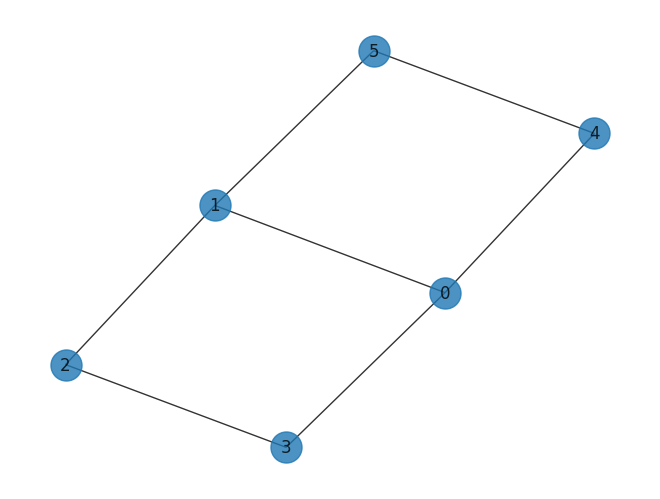

In [68]:
G6 = nx.Graph()
G6.add_nodes_from([0, 1, 2, 3, 4, 5])
G6.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (0, 4), (5,1)])
nx.draw(G6, with_labels=True, alpha=0.8, node_size=500)

## Silq Program and Results
I took the edge parameters from this graph and inputted them into my QAOA.slq file included in my report. Here's the full state and amplitude output from the 6 qubit state:

In [86]:

bashCommand = "silq --run ./QAOA.slq"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

# Raw string outpput from Silq
state_sr = output.decode("utf-8", "strict")

# Regex setup to parse state vector into a dictionary
state_regex = re.compile(r'((?<=\().+?(?=\)))')
state_matches = re.findall(state_regex, state_sr)

state_dict = {}
for i in range(0, len(state_matches), 2):
    state_amp = complex(state_matches[i].replace('i', 'j'))
    state = state_matches[i+1].replace(',', '')
    state_dict[state] = np.abs(state_amp * state_amp.conjugate())

# Porting state vector into DataFrame for cleaner output
state_df = pd.DataFrame(sorted(state_dict.items()), columns=['State', 'Probability'])
pd.set_option('display.max_rows', state_df.shape[0]+1)
state_df

,State,Probability
0,000000,0.014239
1,000001,0.020837
2,000010,0.024500
3,000011,0.010122
4,000100,0.024500
5,000101,0.043207
6,000110,0.040775
7,000111,0.018665
8,001000,0.020837
9,001001,0.031371


Now, let's visualize these state probabilities on a histogram:

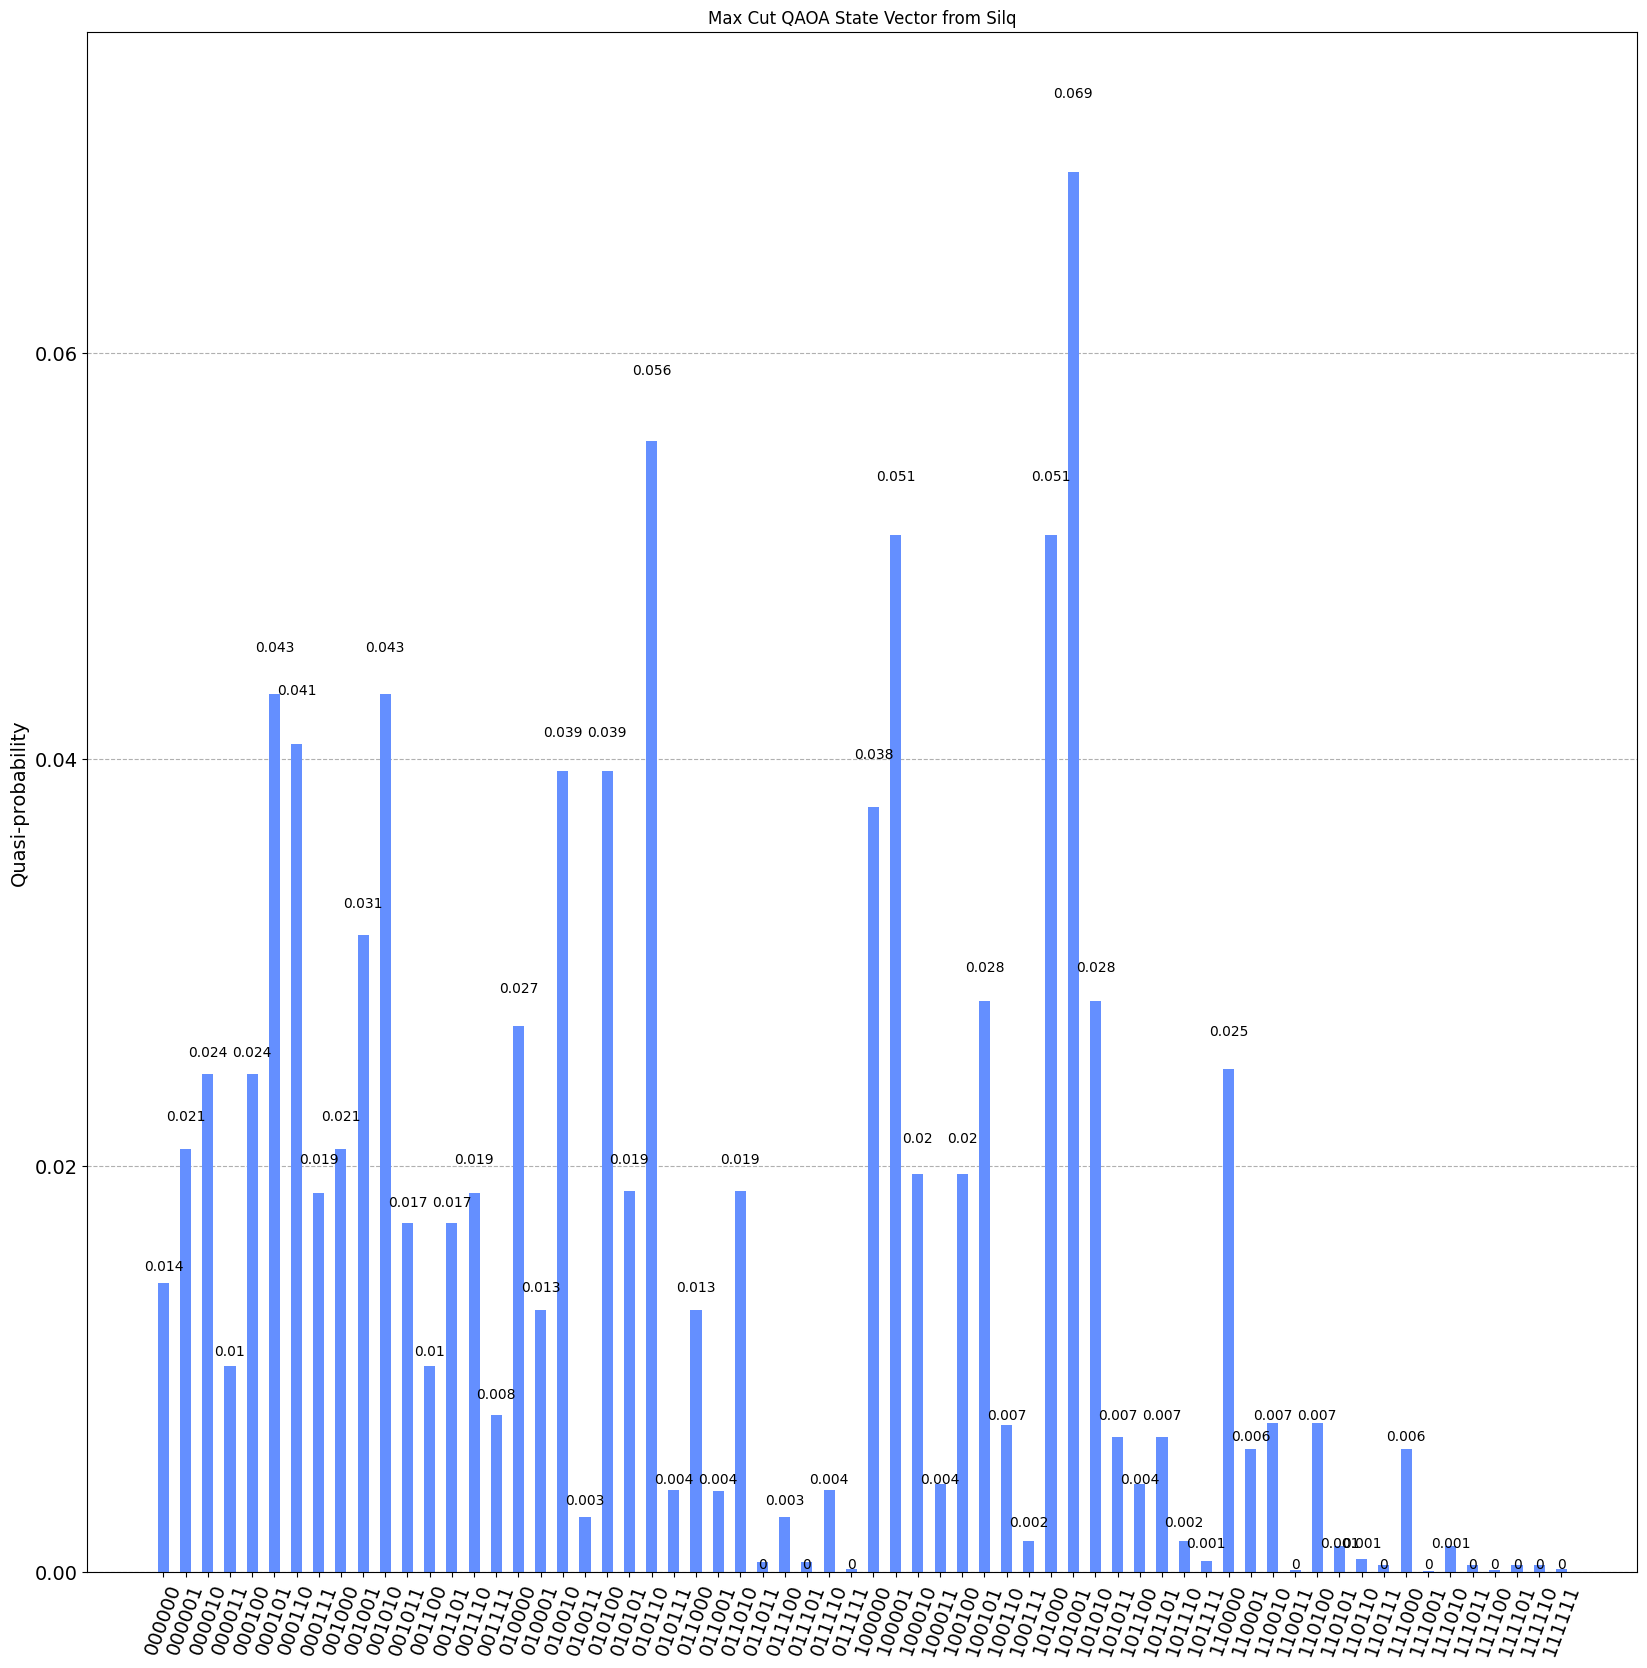

In [87]:

plot_histogram(state_dict, figsize=(20,20), title="Max Cut QAOA State Vector from Silq")


## Discussion
Based off these results for a 6 node graph, we can see the highest amplitudes for the strings '101001' and '010110' - where each 0 and 1 corresponds to the subdivided graph edges. This implies that we have two graphs cut to be 0,2,5 and 1,3,4 which matches up perfectly with our expected results for max cut. 

Its worth noting that this algorithm can be easily tweaked. The graph edges and number of qubits can be edited in the `PARAMETERS` section at the top of the silq file. The beta and gamma parameters are a bit tricker, since they'd need to be optimized through another method. I simply chose the beta/gamma parameters optimized by the `scipy.optimize` function in my previous assignment. This step could easily be repeated for any additional parameterization.

## Pros and Cons of Silq

### Pros
Silq definitely does control operations quite well. I like the ability to do a controlled operation with a single if statement; It's a lot more readable than doing 'cnot' and the likes in qiskit. The methods silq uses to define quantum vs classical variables is quite nice. It really helps distinguish between what's my circuit and what's classical computation acting on my circuit.

### Cons
I found that Silq lacks quite a bit of basic features you see in a lot of modern languages. It's inability to get array lengths or specify array sizes is a bit of an annoyance. As mentioned above the `if` statement syntax is nice, however, it doesn't allow you to test against non-constant circuit values. This means you need to swap a qubit with a constant ancilla register, which is kind of a headache. 


## Conclusion
All in all, I found this assignment quite fun. Its enjoyable to try out a quantum language and I look forward to seeing new updates and additions to Silq going forward.